# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('C:\\Users\\restr\\Documents\\Springboard\\Frequentist_Case_Study\\Frequentist Case Study\\insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows that the data is highly skewed to the right. In such distributions, a majority of the data points fall on the left side (low charges), with a long "tail" extending to the right (high charges).

This means that while most people are charged relatively low amounts (as shown by the high frequency of low charges), there are a few people who are charged significantly higher amounts (as shown by the tail on the right). These higher charges pull the mean upwards, making it a less representative measure of central tendency for this data.

So while the mean and standard deviation can provide some insight into the data (if the data is normally distributed), they are not entirely appropriate for describing skewed data and could give a misleading picture if interpreted in isolation. 

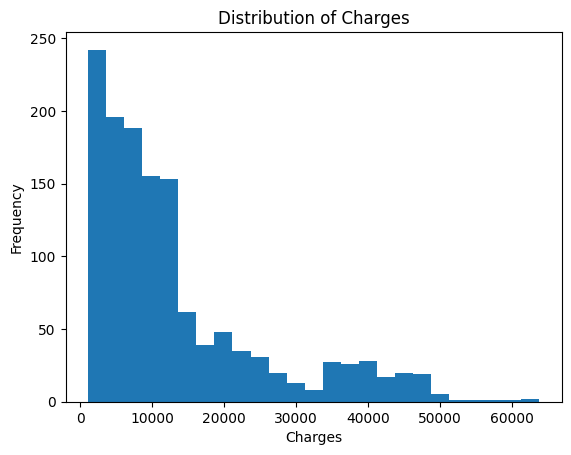

In [4]:
plt.hist(medical['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

In [5]:
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1) # Use Bessel's correction for an unbiased estimate of the population standard deviation from a sample.

print("Mean of charges: ", mean_charges)
print("Standard deviation of charges: ", std_charges)

Mean of charges:  13270.422265141257
Standard deviation of charges:  12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given that we are assuming these data represent a random sample of charges, we can use inference to make conclusions about the population mean from this sample  -> we can use this sample to estimate characteristics of the entire population of charges, including whether the actual average charge has fallen below 12,000.

However, since the data is highly skewed to the right, using just the sample mean to make conclusions about the population mean can be misleading. This is where a confidence interval can be useful. 

A confidence interval provides a range of values which is likely to contain the population mean. We can compute a 95% confidence interval for the mean, which would tell us that we are 95% confident that the true population mean lies within this interval.

As for the most appropriate frequentist test to use, a one-sample t-test would be suitable in this case. The reason we would use a t-test instead of a z-test is that we do not know the standard deviation of the population, and our sample size, while large, may not be large enough to apply the Central Limit Theorem and assume that the sampling distribution of the mean is normal. 

A one-sample t-test will allow us to test the null hypothesis that the population mean is 12,000 against the alternative hypothesis that the population mean is not 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided confidence interval would be more appropriate since we are specifically concerned about whether the mean charge has fallen below 12,000  -> we are worried about a decrease in the mean charge, and not an increase. Therefore, a one-sided confidence interval that checks for a decrease in the mean would be the most relevant in this case.

The calculation for a one-sided confidence interval we calculate the sample mean and standard deviation, then using the t-distribution to find the critical value for the 95% level of confidence, and calculating the lower bound of the confidence interval.

The one-sided confidence interval of 12,725 represents the lower bound on the average charge. Since this lower bound, 12,725 is above 12,000, we can be 95% confident that the true population mean is higher than 12,000. Or based on the sample data we have and the one-sided 95% confidence interval, it's quite unlikely (less than 5% chance) that the true average charge has fallen below 12,000.

In [6]:
n = len(medical.charges)    # sample size
mean_charges = np.mean(medical['charges'])  # sample mean
std_charges = np.std(medical['charges'], ddof=1)    # sample standard deviation (with Bessel's correction)

print("Mean of charges: ", mean_charges)
print("Standard deviation of charges: ", std_charges)

Mean of charges:  13270.422265141257
Standard deviation of charges:  12110.011236693994


In [7]:
std_error = std_charges / np.sqrt(n)  # Calculate the standard error
           
df = n - 1   # Calculate the degrees of freedom

# Calculate the critical value (one-sided test -> we use 0.05 rather than 0.025)
crit_value = t.ppf(0.05, df)

margin_error = crit_value * std_error   # Calculate the margin of error

In [8]:
CI_lower = mean_charges + margin_error
print(CI_lower)

12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis (H0): People with insurance are charged the same amount as those without. (The means of the two groups are equal)

Alternative Hypothesis (H1): People with insurance are charged a different amount to those without. (The means of the two groups are not equal)

The assumption we're making here is that the two groups have equal variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  The p-value is extremely small,  < 0.01 suggesting we reject the null hypothesis. In this case, it indicates that there is a statistically significant difference between the charges for the insured and uninsured groups. Given the p-value is close to zero, it shows the difference in means between insured and uninsured charges is not due to random chance. Seems like people with insurance really are charged a different amount than those without.

In [9]:
# Divide the data into two groups - insured and uninsured.
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']


# Calculate the sample means (𝑥0 and 𝑥1) and sample standard deviations (𝑠0 and 𝑠1) for the insured and uninsured groups, 
# and the sizes of the two groups (𝑛0 and 𝑛1).
mean_insured = np.mean(insured)
mean_uninsured = np.mean(uninsured)

std_insured = np.std(insured, ddof=1)
std_uninsured = np.std(uninsured, ddof=1)

n_insured = len(insured)
n_uninsured = len(uninsured)


In [10]:
# Calculate the pooled standard deviation (𝑠𝑝) and the t-statistic (𝑡)

sp = np.sqrt(((n_insured - 1) * std_insured**2 + (n_uninsured - 1) * std_uninsured**2) / (n_insured + n_uninsured - 2))
t_stat = (mean_insured - mean_uninsured) / (sp * np.sqrt(1/n_insured + 1/n_uninsured))


In [11]:
# The p-value is then the probability of getting a t-value as extreme or more extreme than the one we calculated, 
# assuming the null hypothesis is true.

df = n_insured + n_uninsured - 2
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))  # We multiply by 2 because this is a two-tailed test

We can use scipy.stats to perform the test in one step:

In [12]:
t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured)

In [13]:
print("Manual t-statistic: ", t_stat)
print("Scipy t-statistic: ", t_stat_scipy)

print("Manual p-value: ", p_value)
print("Scipy p-value: ", p_value_scipy)


Manual t-statistic:  11.893299030876715
Scipy t-statistic:  11.893299030876712
Manual p-value:  0.0
Scipy p-value:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy's stats package doesn't include a function for performing a z-test from a sample. 

The reasoning is that when we don't know the population standard deviation (which is the usual case), a t-test is more appropriate than a z-test. The z-test is typically used when we know the population standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test